<a href="https://colab.research.google.com/github/regs08/Notebooks/blob/main/PreprocessYOLOdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the given repo from github we do some preprocessing on the data. First we 
crop the images based on bbox extremes then we split the image by a given interval.

We divide the data into training folders: train, val, test.

It is assumed that the data comes in one folder containing both images, and text annotations in yolo format.


In [1]:
#setting up the repo first uninstalling to ensure its the up to date
%cd /content
!rm -r /content/yolo_data
!git clone https://github.com/regs08/yolo_data.git

/content
rm: cannot remove '/content/yolo_data': No such file or directory
Cloning into 'yolo_data'...
remote: Enumerating objects: 482, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 482 (delta 59), reused 89 (delta 31), pack-reused 358
Receiving objects: 100% (482/482), 75.47 KiB | 9.43 MiB/s, done.
Resolving deltas: 100% (238/238), done.


In [7]:
#setting our dirs
DIRS = {
    'IMAGES': '/content/drive/MyDrive/Datasets/yolo_data/testbbox2seg/SingleBoxes',
    'ANNS':'/content/drive/MyDrive/Datasets/yolo_data/testbbox2seg/SingleBoxes', 
    #saving images
    'SAVE' : '/content/save',
    #where our train, val, test dirs will be 
    'TRAIN_STRUCTURE': '/content/train'
   }

In [8]:
import numpy as np
import random 
import os 

#defaut params.. 
from yolo_data.default_param_configs import class_labels 

#preprocessing functions 
from yolo_data.Preprocessing.VerticalSplit.vertical_split_images import split_images_in_folder
from yolo_data.Preprocessing.Visualize import plot_image_with_boxes

#reading writing, loading files 
from yolo_data.SplittingFolders.split_folder import split_folder_into_train_val_test 
from yolo_data.LoadingData.load_utils import select_random_files
from yolo_data.WritingRenamingFile.yaml_data import write_data_yaml_file



# We will load in our data and perform a crop function on it the crop function will first select the region of bbox extreme, e.g min(list of all xmins) max(list of all ymaxs), then we split this region vertically by the given parameter 'interval'


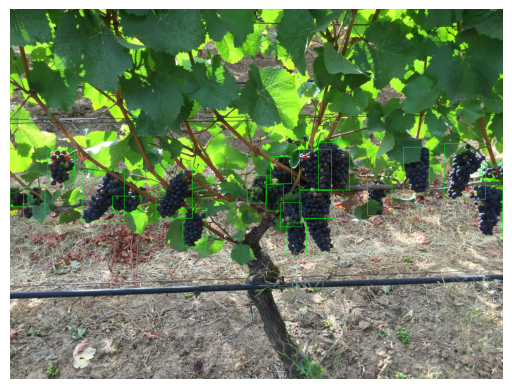

In [9]:
#plotting random original images 
%matplotlib inline

img_file, ann_file = select_random_files(DIRS['IMAGES'], DIRS['ANNS'])
plot_image_with_boxes(img_file, ann_file)

In [10]:
#setting our vertical interval to 1280
interval = 1280

#splitting images in the image folder where each image will have a width of 640 
#and a hieght of at least 1280(set by min pixel value)
#will be saved in save folder 
split_images_in_folder(image_folder=DIRS['IMAGES'],
                       interval=interval,
                       save_folder=DIRS['SAVE'],
                       bbox_extremes=True)


Splitting 49 image(s) in .../SingleBoxes
Saving 1 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 1 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save
Saving 2 images(s) to ../save

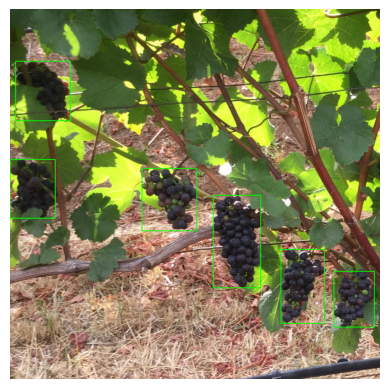

In [11]:
#plotting random split images..
%matplotlib inline

img_file, ann_file = select_random_files(DIRS['SAVE'], DIRS['SAVE'])
plot_image_with_boxes(img_file, ann_file)

In [12]:
#note the random shuffle isn't working properly 

train_dir, val_dir, test_dir = split_folder_into_train_val_test(folder_path=DIRS['SAVE'], 
                        output_folder=DIRS['TRAIN_STRUCTURE'])

In [13]:
write_data_yaml_file(DIRS['TRAIN_STRUCTURE'], class_labels, outdir=DIRS['TRAIN_STRUCTURE'])

'/content/train/data.yaml'